In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

In [5]:
from sklearn.datasets import fetch_california_housing

In [6]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [7]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [9]:
X = X.iloc[:, :-2]

In [10]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [11]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333


In [12]:
def plots(df, var, t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' + str(t).split('(')[0])
    
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after ' + str(t).split('(')[0])

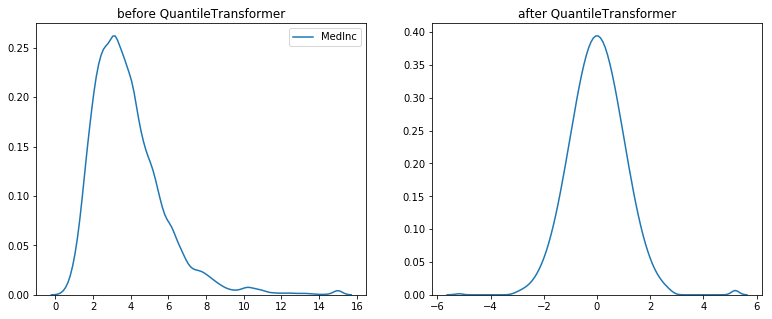

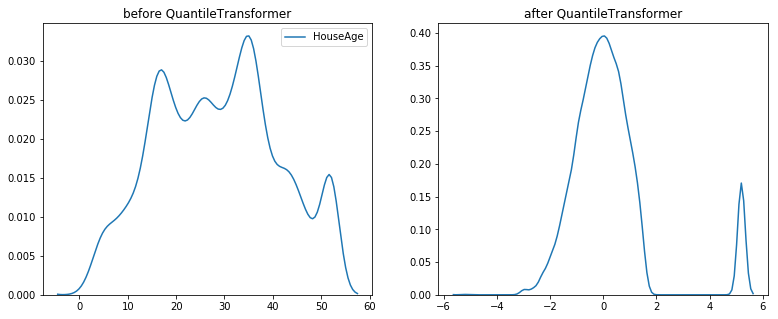

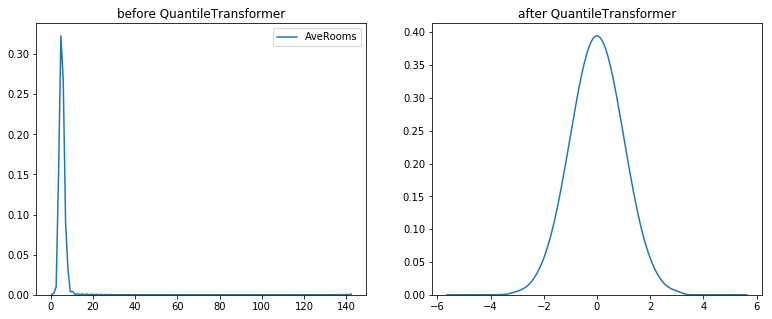

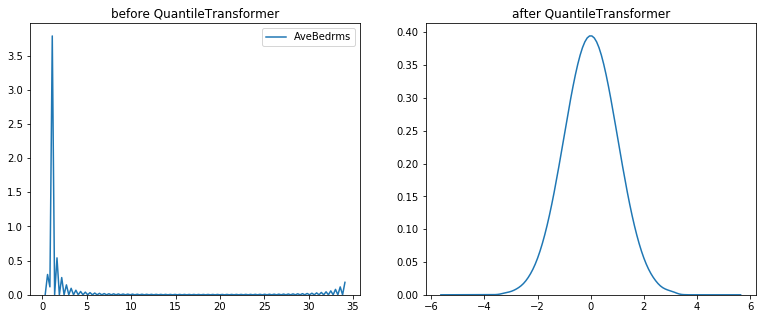

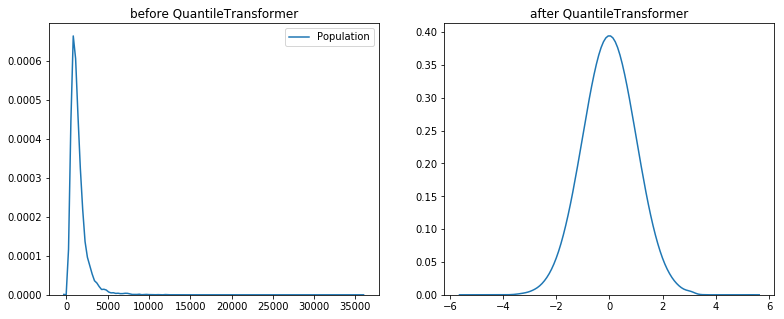

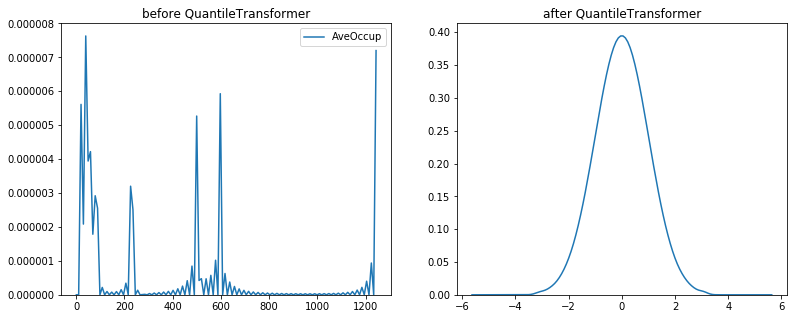

In [13]:
for col in X.columns:
    plots(X, col, QuantileTransformer(output_distribution='normal'))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=0)

In [15]:
p = QuantileTransformer(output_distribution='normal')
p.fit_transform(X_train)

array([[ 0.42299527, -1.84481081,  1.67936653,  1.25040837, -1.91731398,
         0.92680205],
       [ 0.49786003,  5.19933758,  0.07604477,  0.68368291,  0.41837129,
         0.72514284],
       [ 0.23148337, -0.16891199, -0.48176968, -0.03613608, -0.22262957,
        -0.06251273],
       ...,
       [-0.20865521,  0.13084756, -1.45136173, -1.61430461, -0.8552868 ,
        -1.81586839],
       [ 1.07165125,  0.35081689, -0.59136509,  0.22726426, -0.17527843,
        -0.99960138],
       [-1.89546022, -1.04657574, -1.15421657,  0.68368291, -0.21877307,
         0.85574904]])

In [17]:
p.quantiles_

array([[4.99900000e-01, 1.00000000e+00, 8.46153846e-01, 3.33333333e-01,
        3.00000000e+00, 7.50000000e-01],
       [5.36000000e-01, 2.00000000e+00, 1.74962005e+00, 6.73700367e-01,
        1.85275275e+01, 1.30778087e+00],
       [7.44654154e-01, 2.00000000e+00, 2.01837721e+00, 7.55724307e-01,
        2.60550551e+01, 1.36061369e+00],
       ...,
       [1.50001000e+01, 5.20000000e+01, 2.40225396e+01, 4.97882498e+00,
        8.80433934e+03, 9.93775031e+00],
       [1.50001000e+01, 5.20000000e+01, 2.95341602e+01, 6.07117306e+00,
        1.03861692e+04, 1.38383057e+01],
       [1.50001000e+01, 5.20000000e+01, 1.41909091e+02, 3.40666667e+01,
        3.56820000e+04, 5.99714286e+02]])

In [18]:
def model_accuracy_scaled(mod):
    model_scaled = Pipeline([
        ('scale', QuantileTransformer(output_distribution='normal')),
        ('model', mod)
    ])
    model_scaled.fit(X_train, y_train)
    return model_scaled.score(X_test, y_test)

def model_accuracy_unscaled(mod):
    model_unscaled = Pipeline([
        ('model', mod)
    ])
    model_unscaled.fit(X_train, y_train)
    return model_unscaled.score(X_test, y_test)

In [19]:
model_accuracy_scaled(KNeighborsRegressor())

0.6365835864019451

In [20]:
model_accuracy_unscaled(KNeighborsRegressor())

0.17191143873653625

In [21]:
model_accuracy_scaled(RandomForestRegressor(random_state=0))

0.6684382410625838

In [22]:
model_accuracy_unscaled(RandomForestRegressor(random_state=0))

0.6687567614986214